In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('economic_index.csv') 

In [7]:
df.drop(columns = ["Unnamed: 0","year","month"],axis=1,inplace = True)

In [8]:
df

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


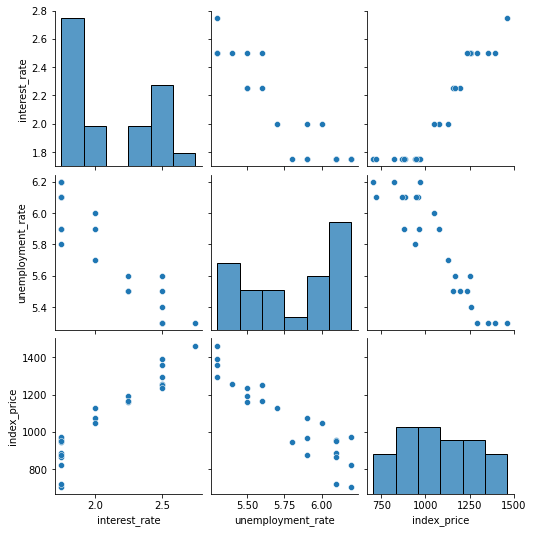

In [10]:
sns.pairplot(df)

In [11]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


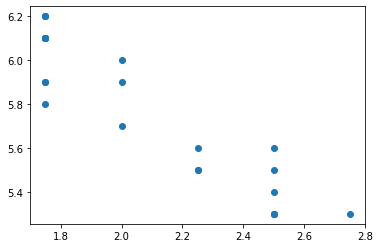

In [15]:
plt.scatter(df['interest_rate'],df['unemployment_rate'])

In [16]:
X = df[['interest_rate','unemployment_rate']]

In [17]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [18]:
y = df['index_price']

In [19]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

C:\Users\Lakshay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='interest_rate', ylabel='index_price'>

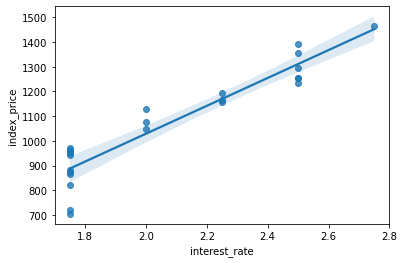

In [22]:
sns.regplot(df['interest_rate'],df['index_price'])

C:\Users\Lakshay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='unemployment_rate', ylabel='index_price'>

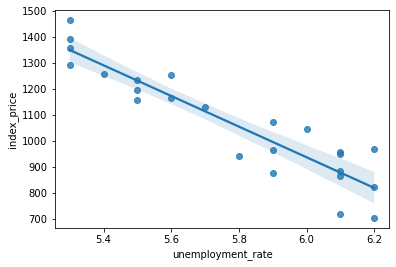

In [23]:
sns.regplot(df['unemployment_rate'],df['index_price'])

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
X_train = scaler.fit_transform(X_train)

In [27]:
X_test = scaler.transform(X_test)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
regg = LinearRegression()

In [30]:
regg.fit(X_train,y_train)

LinearRegression()

In [31]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regg,X_train,y_train,scoring = 'neg_mean_squared_error',cv=3)

In [33]:
np.mean(validation_score)

-5914.828180162388

In [34]:
print(f'Coefficient or slope : {regg.coef_}')
print(f'Intercept:{regg.intercept_}')

Coefficient or slope : [  88.27275507 -116.25716066]
Intercept:1053.4444444444443


In [36]:
y_pred = regg.predict(X_test)

In [37]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(f'{mse}\n{mae}\n{rmse}')

5793.762887712579
59.935781523235526
76.11677139574812


In [39]:
from sklearn.metrics import r2_score

In [40]:
r2 = r2_score(y_test,y_pred)
r2

0.8278978091457142

In [41]:
adjusted_r2 = 1-((1-r2)*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1))
adjusted_r2

0.713163015242857

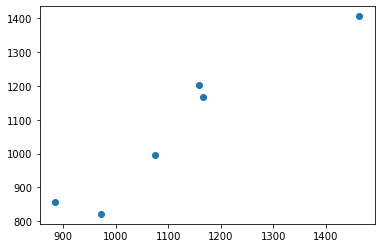

In [42]:
plt.scatter(y_test,y_pred)

In [43]:
residuals = y_test-y_pred

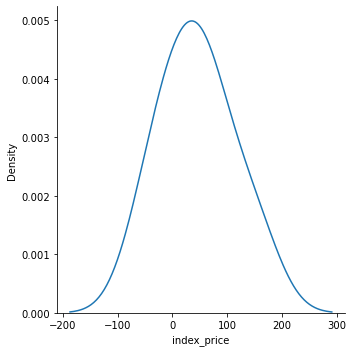

In [45]:
sns.displot(residuals,kind='kde')

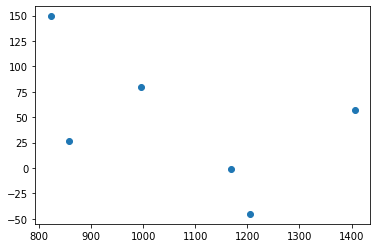

In [46]:
plt.scatter(y_pred,residuals)

In [47]:
import statsmodels.api as sm

In [48]:
model = sm.OLS(y_train,X_train).fit()

In [49]:
predictions = model.predict(X_test)

In [50]:
model.summary()

C:\Users\Lakshay\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sun, 12 Jan 2025   Prob (F-statistic):                       0.754
Time:                        02:21:50   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""